#**Prediksi Customer Churn Menggunakan Machine Learning**

## **Pendahuluan**
Prediksi Churn Pelanggan adalah mengetahui pelanggan mana yang kemungkinan besar akan meninggalkan atau berhenti berlangganan dari layanan Anda. Bagi banyak perusahaan, ini adalah prediksi penting. Hal ini karena memperoleh pelanggan baru sering kali lebih mahal daripada mempertahankan yang sudah ada. Setelah Anda mengidentifikasi pelanggan yang berisiko churn, Anda perlu mengetahui secara tepat upaya pemasaran apa yang harus Anda lakukan dengan masing-masing pelanggan untuk memaksimalkan kemungkinan mereka tetap tinggal.

Misalnya, sebuah Bank sangat ingin mempertahankan sebanyak mungkin pelanggan aktif. Secara alami, mereka ingin tahu apakah kebutuhan basis klien mereka terpenuhi atau apakah klien mereka berencana untuk meninggalkan perusahaan. Jika bank mencurigai bahwa klien mereka berpotensi beralih ke perusahaan lain, bank dapat mengambil langkah-langkah untuk meyakinkan klien untuk tetap tinggal (kampanye pemasaran yang ditargetkan, sikap yang lebih personal, dll.).

Dalam analisis ini, kami akan menggunakan dataset yang berisi data pelanggan dari sebuah bank. Tujuan kami adalah melakukan analisis eksploratif untuk mendapatkan wawasan tentang faktor utama yang memengaruhi churn pelanggan. Selain itu, kami akan mengembangkan model machine learning untuk memprediksi churn pelanggan dengan akurat.

Dataset: https://www.kaggle.com/datasets/shubh0799/churn-modelling/data



## **1. Import Libraries dan Data yang diperlukan**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
sns.set(font_scale=2)

#splitting data
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

#Scaling data - normalization dan encoding
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler

#oversampling techinque for imbalance
from imblearn.over_sampling import SMOTE

# predicting model
from sklearn.ensemble import RandomForestClassifier

# evaluasi metrics
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    classification_report
)
# evaluasi plots
from yellowbrick.classifier import (
    DiscriminationThreshold,
    PrecisionRecallCurve
)

In [ ]:
# from google.colab import drive

# #load data dari file csv
# drive.mount('/content/drive')
# PATH = '/content/drive/My Drive/Semester 6/PDS/dataset'
# data = pd.read_csv(PATH + "/Churn_Modelling.csv")

# data = pd.read_csv('../input/Churn_Modelling.csv')

data = pd.read_csv("https://raw.githubusercontent.com/azzandwi1/analyzing_and_predicting_customer_churn/main/data/Customer-Churn.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


## **2. Exploratory Data Analysis**

EDA, atau Exploratory Data Analysis, adalah proses analisis awal data yang bertujuan untuk memahami karakteristik, struktur, dan komponen penting dari dataset sebelum melakukan analisis statistik atau pemodelan prediktif lebih lanjut. Hal-hal yang kami lakukan dalam Exploratory Data Analysis ini adalah:

1. Memahami variabel dataset
2. Membersihkan dataset
3. Plot variabel dataset
4. Menganalisis hubungan antara variabel

### **2.1 Memahami variabel dataset**

In [ ]:
# melihat 5 baris pertama
data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [ ]:
# jumlah baris dan atribut
data.shape

(10000, 18)

In [ ]:
# nama semua atribut yang ada dalam dataset
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

Kami menggunakan dataset dari klien bank (10000 baris) dengan atribut sebagai berikut.
* Rownumber: ID unik untuk setiap baris
* CustomerID: ID unik untuk setiap klien
* Surname: Nama belakang klien
* CreditScore: Skor kredit klien
* Geography: Negara asal klien
* Gender: Jenis kelamin klien
* Age: Usia klien
* Tenure: Jumlah tahun di mana klien telah bersama bank
* Balance: Saldo klien dalam akun
* NumOfProducts: Jumlah produk klien
* HasCrCard: Tanda apakah klien memiliki kartu kredit atau tidak
* IsActiveMember: Tanda apakah klien merupakan anggota aktif bank atau tidak
* EstimatedSalary: Pendapatan tahunan yang diestimasi dari klien dalam euro
* Exited: Variabel target, tanda, apakah klien meninggalkan bank atau tidak
* Complain: Variabel biner yang menunjukkan apakah pelanggan telah mengajukan keluhan (1 untuk ya, 0 untuk tidak).
* Satisfaction Score: Skor kepuasan pelanggan (jika tersedia).
* Card Type: Jenis kartu kredit (jika ada).
* Point Earned: Poin yang diperoleh oleh pelanggan melalui transaksi atau program bank.

In [ ]:
# nama semua atribut dan tipe data yang ada dalam dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [ ]:
# jumlah elemen yang unik dalam setiap atribut
data.nunique(axis=0)

RowNumber             10000
CustomerId            10000
Surname                2932
CreditScore             460
Geography                 3
Gender                    2
Age                      70
Tenure                   11
Balance                6382
NumOfProducts             4
HasCrCard                 2
IsActiveMember            2
EstimatedSalary        9999
Exited                    2
Complain                  2
Satisfaction Score        5
Card Type                 4
Point Earned            785
dtype: int64

In [ ]:
# memeriksa apakah ada pelanggan duplikat
print("Dari {all} pelanggan, {num} di antaranya unik.".format(all = len(data),num = len(data.CustomerId.unique())))

Dari 10000 pelanggan, 10000 di antaranya unik.


In [ ]:
# description of the data
display(data.describe())
display(data.describe(include='object'))

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


,Surname,Geography,Gender,Card Type
count,10000,10000,10000,10000
unique,2932,3,2,4
top,Smith,France,Male,DIAMOND
freq,32,5014,5457,2507


### **2.2 Membersihkan dataset**

#### Checking for Missing Values

In [ ]:
# cek missing values
data.isna().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

#### Feature Selection

In [ ]:
# hapus atribut yang tidak diperlukan (feature selection)
data = data.drop(labels=['RowNumber', 'CustomerId', 'Surname'], axis=1)

#### Grouping features to categorical and numerical

In [ ]:
# Pemisahan Variabel/Kolom Numerik dan Kategorikal
# cat_col = data.select_dtypes(include=['object']).columns
# num_col = data.select_dtypes(exclude=['object']).columns
# data_cat = data[cat_col]
# data_num = data[num_col]

# pemisahan fitur-fitur kategorikal dan numerik
target = ['Exited']
cat_feats = ['Geography', 'Gender', 'Card Type', 'Satisfaction Score', 'IsActiveMember', 'HasCrCard', 'Complain']
num_feats = [col for col in data if col not in (cat_feats+target)]

In [ ]:
num_feats

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'EstimatedSalary',
 'Point Earned']

### **2.3 Visualisasi Data**

#### Distribusi Data

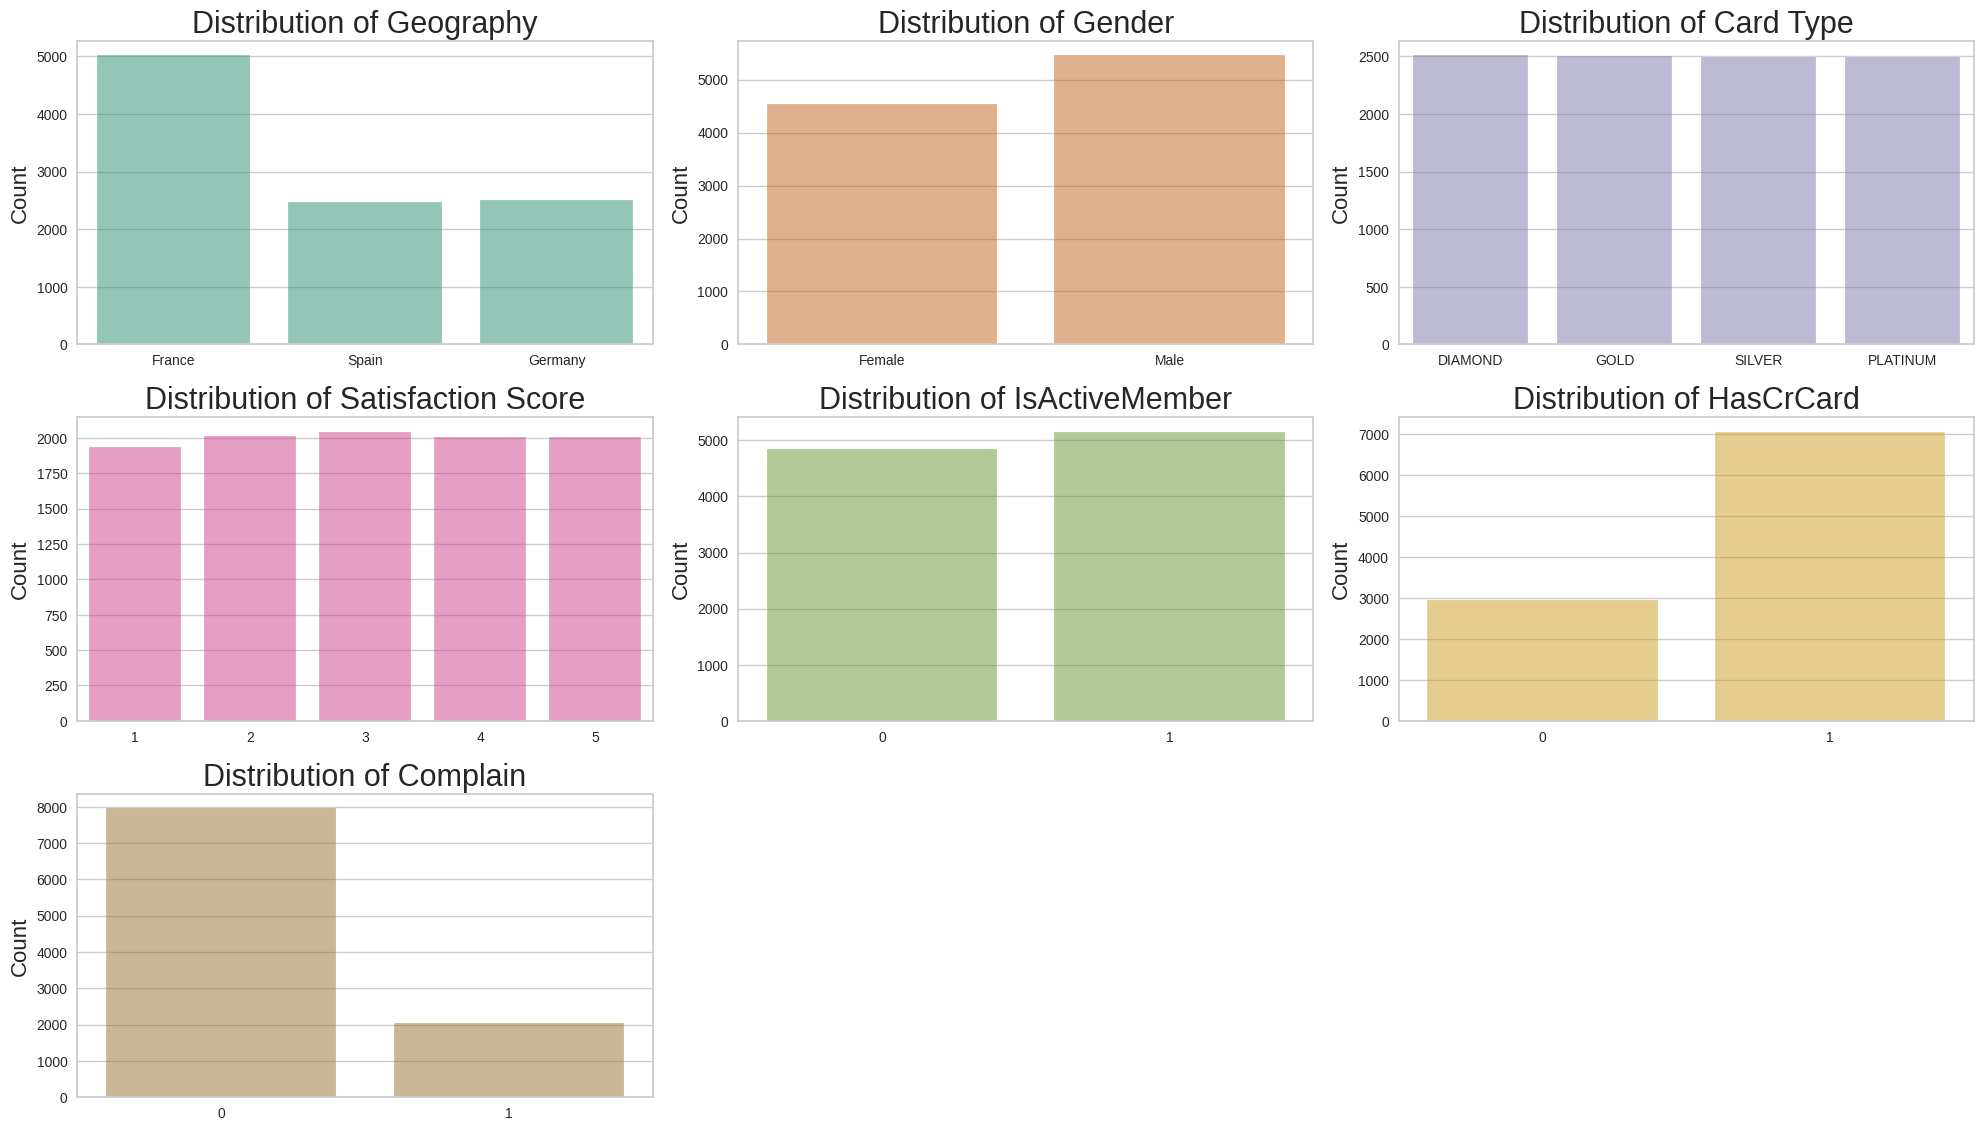

In [ ]:
#Membuat grafik distribusi dari variabel kategorikal
f = plt.figure(figsize=(20,15))

for i, col in enumerate(cat_feats):
    plt.subplot(4,3, i+1)
    if len(data[col].unique()) <= 5:
        sns.countplot(data=data, x=col, color=sns.color_palette("Dark2")[i], alpha=0.5)
        plt.ylabel("Count", fontdict={'fontsize':16})
    else:
        sns.countplot(data=data, y=col, order=data[col].value_counts().index,color=sns.color_palette("Dark2")[i],alpha=0.5)
    plt.title(f"Distribution of {col}", fontdict={'fontsize':22})
    plt.xlabel("")
    #plt.ylabel("")

plt.tight_layout()
plt.savefig("Categorical distributions")
plt.show()

- Tidak ada perbedaan yang sangat besar dalam distribusi gender pelanggan. Ini menunjukkan bahwa bank memasarkan kepada kedua gender dengan sama.

- Hampir semua jenis kartu memiliki jumlah pelanggan yang sama. Distribusi jenis kartu menunjukkan bahwa pelanggan memiliki preferensi yang beragam, dan bank telah berhasil memasarkan dan menyediakan pilihan untuk berbagai jenis kartu untuk memenuhi kebutuhan pelanggan.

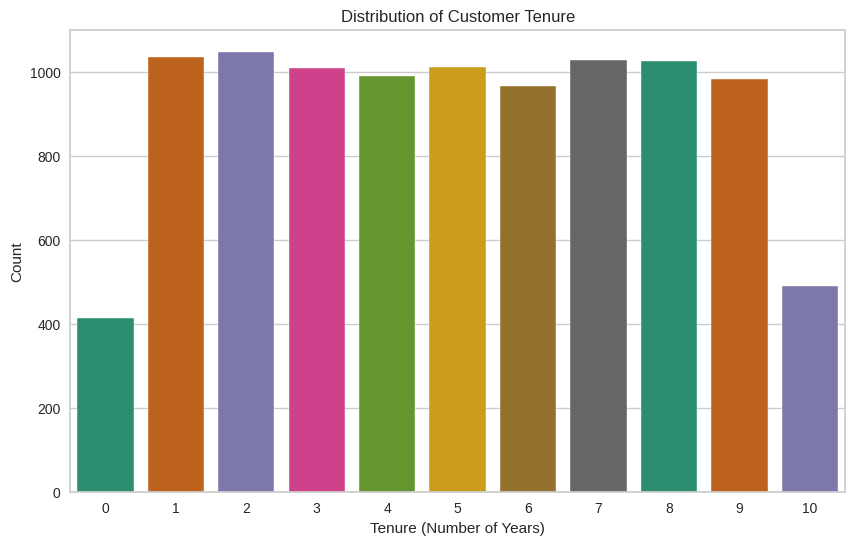

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Tenure', hue='Tenure', palette="Dark2", legend=False)
plt.title('Distribution of Customer Tenure')
plt.xlabel('Tenure (Number of Years)')
plt.ylabel('Count')
plt.show()

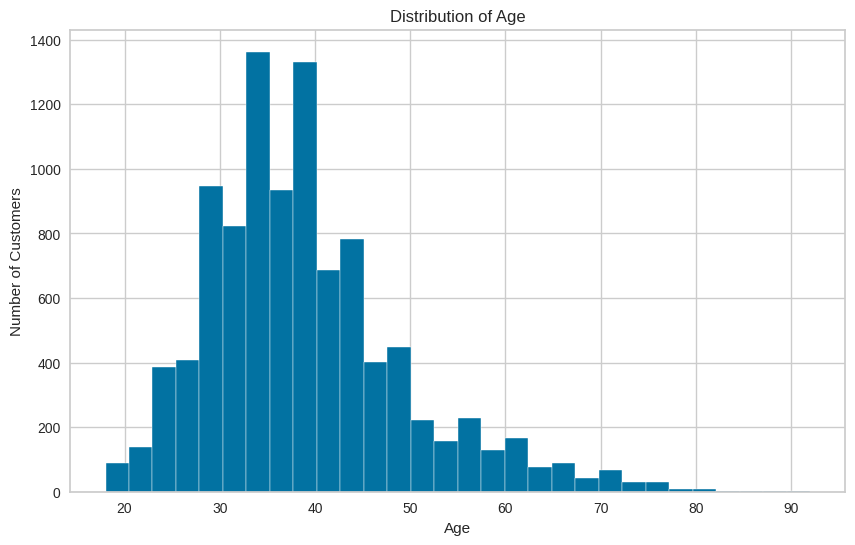

In [ ]:
# Plot histogram dari 'Age'

plt.figure(figsize =(10,6))
plt.hist(data['Age'], bins=30)
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.title('Distribution of Age')
plt.show()

Customers dari umur 25-50 adalah yang paling banyak. Kelompok umur ini mewakili populasi pekerja dan individu yang kemungkinan memiliki kebutuhan perbankan seperti pinjaman, tabungan, dan investasi.

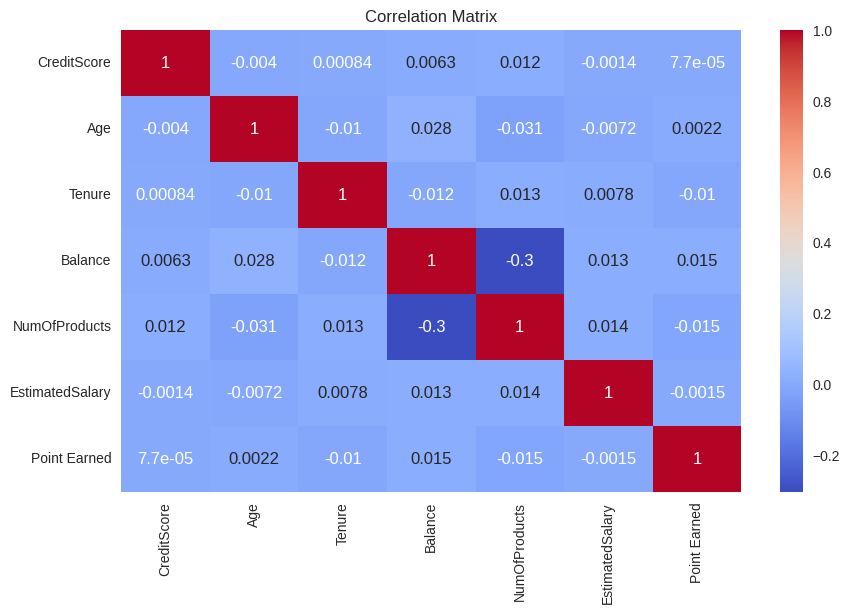

In [ ]:
# Memasukan korelasi matrix
corr_matrix = data[num_feats].corr()

# Membuat heatmap dari korelasi matrix
plt.figure(figsize =(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Korelasi yang ditemukan antara variabel-variabel ini cenderung lemah, yang menunjukkan bahwa tidak ada hubungan linier yang kuat antara mereka. Korelasi yang lemah menunjukkan bahwa customer churn mungkin dipengaruhi oleh kombinasi dari beberapa faktor daripada satu faktor dominan.

#### Jumlah customer churn atau stay di bank

In [ ]:
# Persentase pelanggan yang berhenti atau tetap di bank.
total_customers = len(data)
churned_count = data[data['Exited'] == 1]['Exited'].count()
not_churned_count = data[data['Exited'] == 0]['Exited'].count()
percentage_churned = (churned_count / total_customers) * 100
percentage_not_churned = (not_churned_count / total_customers) * 100


print(f"total of customers who churned: {churned_count}")
print(f"total of customers who did not churn: {not_churned_count}")
print(f"Percentage of customers who churned: {percentage_churned:.2f}%")
print(f"Percentage of customers who did not churn: {percentage_not_churned:.2f}%")

total of customers who churned: 2038
total of customers who did not churn: 7962
Percentage of customers who churned: 20.38%
Percentage of customers who did not churn: 79.62%


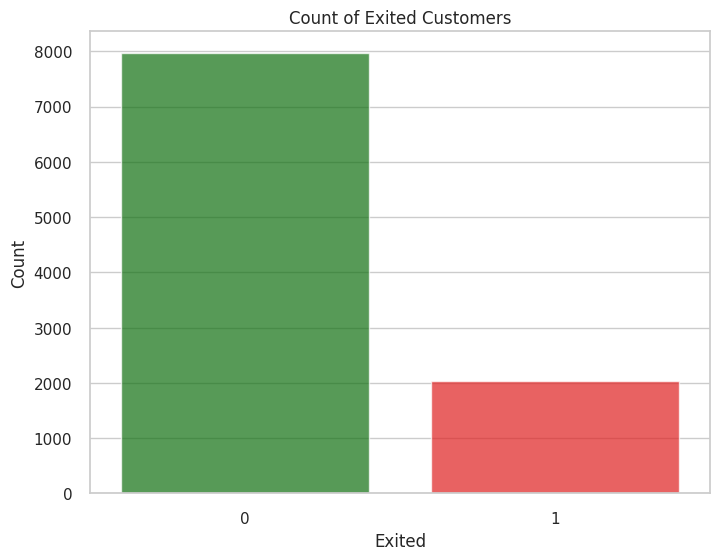

In [ ]:
sns.set(style="whitegrid")

# Membuat plot batang untuk kolom 'Exited' dengan warna kustom
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Exited', hue='Exited', palette=['green', 'red'], alpha=0.7, legend=False)
plt.title('Count of Exited Customers')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.show()

Terlihat bahwa terdapat ketidakseimbangan dalam dataset antara pelanggan yang berhenti (churn) dan yang tetap, hal ini dapat mempengaruhi kinerja model yang akan kita latih. <br><br>
*Note: Kita akan coba atasi masalah ini pada bagian preprocessing nanti. Sekarang kita lanjutkan analisis kita dulu.*

#### Churn berdasarkan Gender

In [ ]:
# sns.set(style="whitegrid")
# plt.figure(figsize=(8, 6))
# sns.countplot(data=data, x='Gender', hue='Exited', palette=['green', 'red'], alpha=0.7)
# plt.title('Gender vs Exited Customers')
# plt.xlabel('Gender')
# plt.ylabel('Count')
# plt.legend(title='Exited', loc='upper right', labels=['Not Churned', 'Churned'])
# plt.show()

In [ ]:
# # Plot the churn rate by 'Geography' and 'Gender'
# plt.figure(figsize =(10,6))

# churn_rate_gender = data.groupby(['Gender'])['Exited'].mean().reset_index()

# sns.barplot(data=churn_rate_gender, x='Gender', y='Exited', hue='Exited', palette=['green', 'red'], alpha=0.7, legend=False)
# plt.xlabel('Gender')
# plt.ylabel('Churn Rate')
# plt.show()

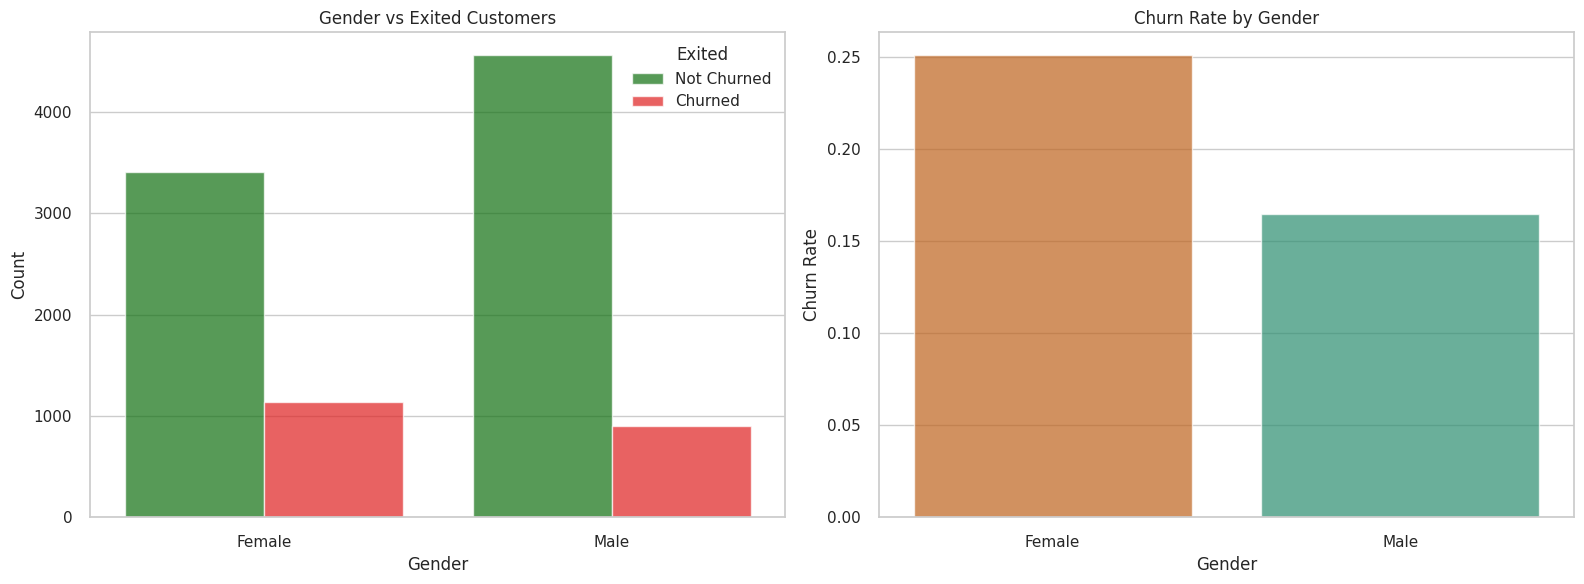

In [ ]:
# Set the style and size of the plots
sns.set(style="whitegrid")
plt.figure(figsize=(16, 6))

# Plot the count of exited customers by gender
plt.subplot(1, 2, 1)
sns.countplot(data=data, x='Gender', hue='Exited', palette=['green', 'red'], alpha=0.7)
plt.title('Gender vs Exited Customers')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Exited', loc='upper right', labels=['Not Churned', 'Churned'])

# Plot the churn rate by gender
plt.subplot(1, 2, 2)
churn_rate_gender = data.groupby(['Gender'])['Exited'].mean().reset_index()
sns.barplot(data=churn_rate_gender, x='Gender', y='Exited', hue='Exited', palette='Dark2', alpha=0.7, legend=False)
plt.title('Churn Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Churn Rate')

# Show the plots
plt.tight_layout()
plt.show()

Perempuan memiliki tingkat churn yang lebih tinggi dibandingkan laki-laki. Tingkat churn yang lebih tinggi di antara pelanggan perempuan dapat dipengaruhi oleh berbagai faktor seperti kepuasan pelanggan, kualitas layanan, strategi pemasaran yang ditargetkan, dll.

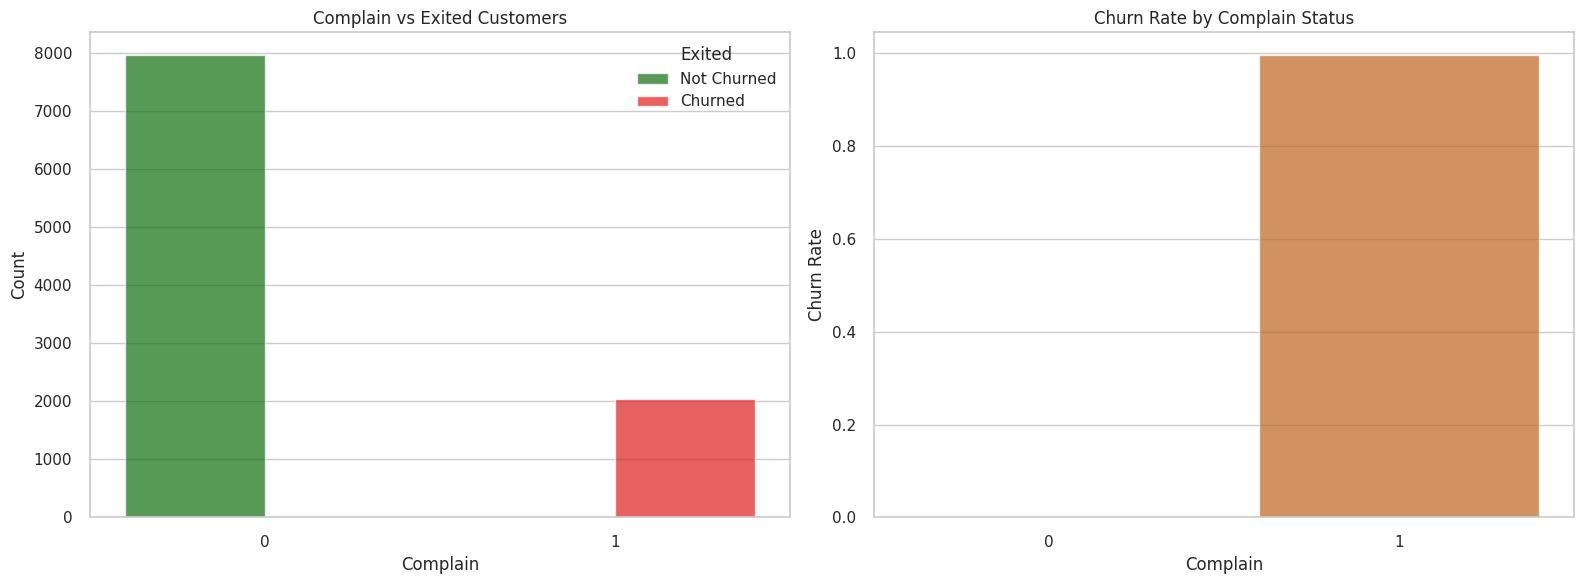

In [ ]:
# Set the style and size of the plots
sns.set(style="whitegrid")
plt.figure(figsize=(16, 6))

# Plot the count of exited customers by complain status
plt.subplot(1, 2, 1)
sns.countplot(data=data, x='Complain', hue='Exited', palette=['green', 'red'], alpha=0.7)
plt.title('Complain vs Exited Customers')
plt.xlabel('Complain')
plt.ylabel('Count')
plt.legend(title='Exited', loc='upper right', labels=['Not Churned', 'Churned'])

# Plot the churn rate by complain status
plt.subplot(1, 2, 2)
churn_rate_complain = data.groupby(['Complain'])['Exited'].mean().reset_index()
sns.barplot(data=churn_rate_complain, x='Complain', y='Exited', hue='Exited', palette='Dark2', alpha=0.7, legend=False)
plt.title('Churn Rate by Complain Status')
plt.xlabel('Complain')
plt.ylabel('Churn Rate')

# Show the plots
plt.tight_layout()
plt.show()


#### Churn berdasarkan Geography dan Gender

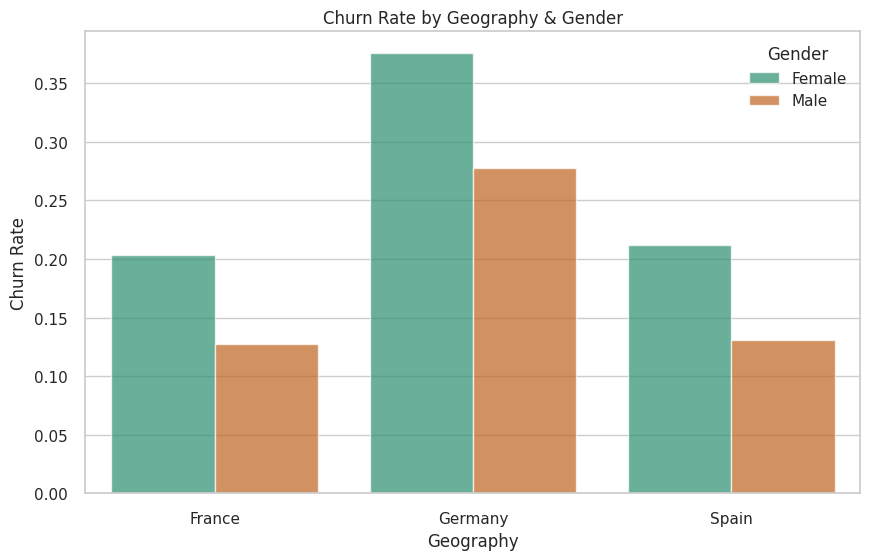

In [ ]:
# Plot churn rate berdsarkan 'Geography' dan 'Gender'
plt.figure(figsize =(10,6))

churn_rate_geo_gender = data.groupby(['Geography','Gender'])['Exited'].mean().reset_index(name="Churn Rate")
sns.barplot(data=churn_rate_geo_gender, x= 'Geography', y= 'Churn Rate', hue='Gender', palette='Dark2', alpha=0.7)
plt.xlabel('Geography')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Geography & Gender')
plt.show()

Jerman memiliki pelanggan yang paling tinggi tingkat churn-nya. Dan di antara jenis kelamin, wanita memiliki tingkat churn yang lebih tinggi. Ini bisa disebabkan oleh berbagai alasan seperti ketidakpuasan pelanggan, penawaran kompetitif dari bank lain, atau kondisi pasar yang spesifik di Jerman.

#### Churn berdasarkan Tipe Kartu

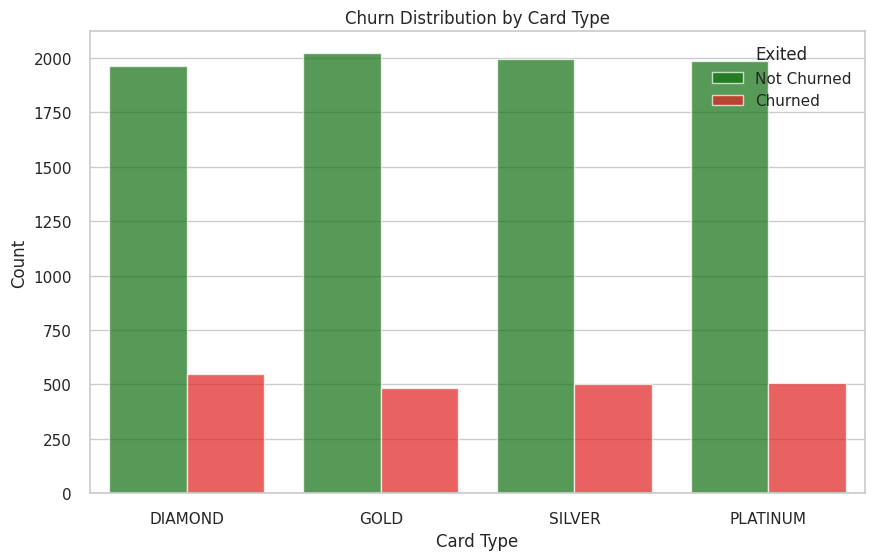

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Card Type', hue='Exited', order=['DIAMOND', 'GOLD', 'SILVER', 'PLATINUM'], palette=['green', 'red'], alpha=0.7)
plt.title('Churn Distribution by Card Type')
plt.xlabel('Card Type')
plt.ylabel('Count')
plt.legend(title='Exited', loc='upper right', labels=['Not Churned', 'Churned'])
plt.show()

Tampaknya tidak ada efek signifikan dari Jenis Kartu pada churn atau retensi pelanggan.

#### Churn berdasarkan Jumlah Produk

In [ ]:
# plt.figure(figsize=(8, 6))
# sns.countplot(data=data, x='NumOfProducts', hue='Exited', palette=['green', 'red'], alpha=0.7)
# plt.title('Churn Distribution by Number of Products')
# plt.xlabel('Number of Products')
# plt.ylabel('Count')
# plt.legend(title='Exited', loc='upper right', labels=['Not Churned', 'Churned'])
# plt.show()

In [ ]:
# # Calculate churn percentages by number of products
# churn_percentage_by_product_count = data.groupby('NumOfProducts')['Exited'].mean() * 100

# # Display churn percentage by number of products
# print("Churn Percentage by Number of Products:")
# print(churn_percentage_by_product_count)

In [ ]:
# # Plot the churn rate by 'NumOfProducts'
# plt.figure(figsize =(10,6))

# churn_rate_nop = data.groupby(['NumOfProducts'])['Exited'].mean().reset_index()

# sns.barplot(data=churn_rate_nop, x='NumOfProducts', y='Exited', hue='Exited', palette='Dark2', alpha=0.7, legend=False)
# plt.xlabel('Number of Products')
# plt.ylabel('Churn Rate')
# plt.show()

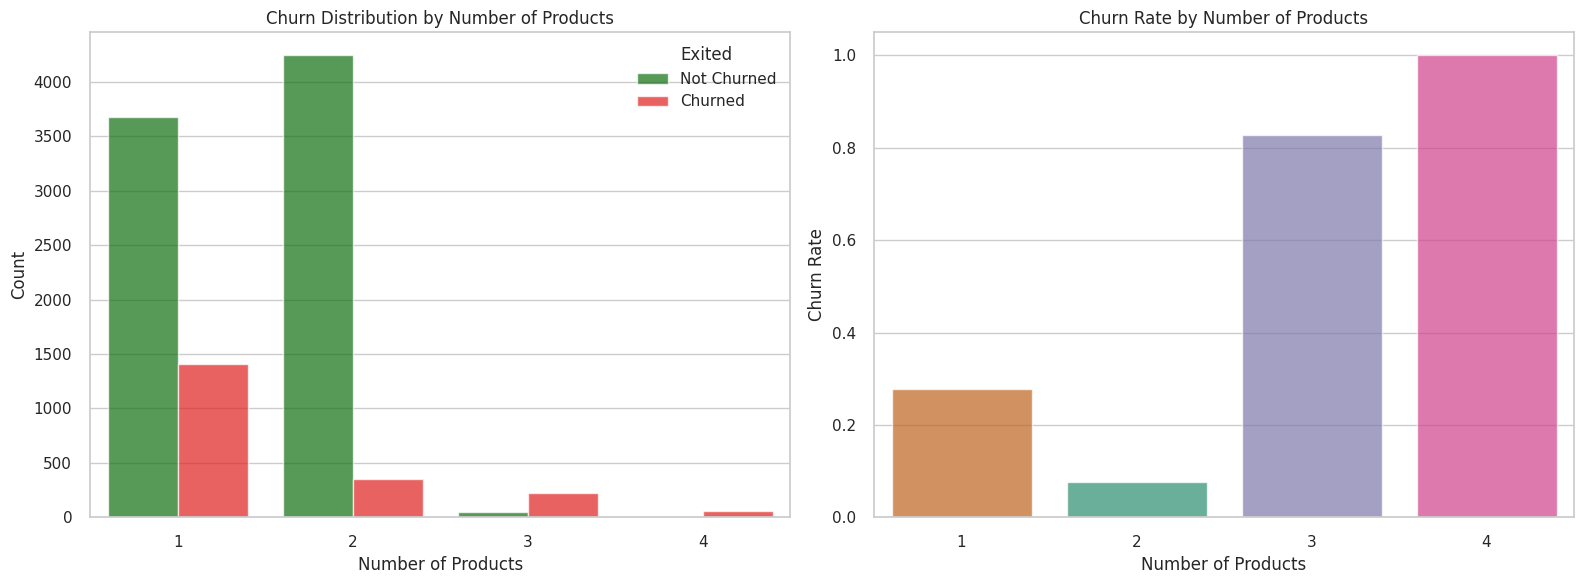

In [ ]:
# Set style dan size dari plots
sns.set(style="whitegrid")
plt.figure(figsize=(16, 6))

# Plot jumlah pelanggan yang keluar berdasarkan jumlah produk.
plt.subplot(1, 2, 1)
sns.countplot(data=data, x='NumOfProducts', hue='Exited', palette=['green', 'red'], alpha=0.7)
plt.title('Churn Distribution by Number of Products')
plt.xlabel('Number of Products')
plt.ylabel('Count')
plt.legend(title='Exited', loc='upper right', labels=['Not Churned', 'Churned'])

# Plot tingkat churn berdasarkan jumlah produk.
plt.subplot(1, 2, 2)
churn_rate_nop = data.groupby(['NumOfProducts'])['Exited'].mean().reset_index()
sns.barplot(data=churn_rate_nop, x='NumOfProducts', y='Exited', hue='Exited', palette='Dark2', alpha=0.7, legend=False)
plt.title('Churn Rate by Number of Products')
plt.xlabel('Number of Products')
plt.ylabel('Churn Rate')

# Menampilkan plot
plt.tight_layout()
plt.show()

Pelanggan dengan jumlah produk yang lebih tinggi (3 atau 4) menunjukkan probabilitas churn yang lebih tinggi. Sebaliknya, pelanggan dengan hanya 2 produk memiliki peluang lebih rendah untuk meninggalkan bank dibandingkan dengan mereka yang hanya memiliki 1 produk.

#### Churn berdasarkan Kepemilikan Credit Card

In [ ]:
# plt.figure(figsize=(8, 7))
# sns.countplot(data=data, x='HasCrCard', hue='Exited', palette=['green', 'red'], alpha=0.7)
# plt.title('Churn Distribution by Having Credit Card')
# plt.xlabel('Has Credit Card')
# plt.ylabel('Count')
# plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])  # Set x-axis labels as 'No' and 'Yes'
# plt.legend(title='Exited', loc='upper right', labels=['Not Churned', 'Churned'])
# plt.show()

In [ ]:
# # Calculate churn percentages by HasCrCard
# churn_percentage_by_card = data.groupby('HasCrCard')['Exited'].mean() * 100

# # Display churn percentage by HasCrCard
# print("Churn Percentage by Having Credit Card:")
# print(churn_percentage_by_card)

In [ ]:
# # Plot the churn rate by 'HasCrCard'
# plt.figure(figsize =(10,6))

# churn_rate_hascrcard = data.groupby(['HasCrCard'])['Exited'].mean().reset_index()

# sns.barplot(data=churn_rate_hascrcard, x='HasCrCard', y='Exited', hue='Exited', palette='Dark2', alpha=0.7, legend=False)
# plt.xlabel('Having Credit Card')
# plt.ylabel('Churn Rate')
# plt.show()

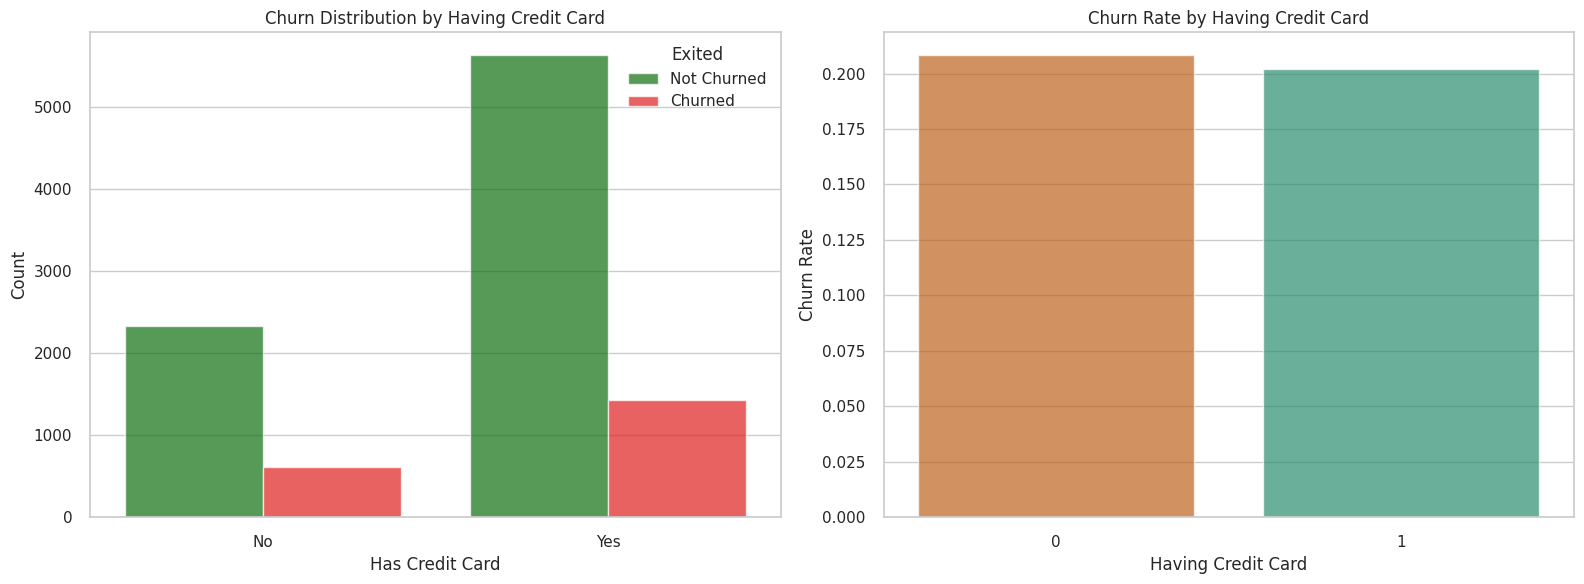

In [ ]:
# Atur gaya dan ukuran dari plotnya
sns.set(style="whitegrid")
plt.figure(figsize=(16, 6))

# Plot jumlah pelanggan yang keluar dengan memiliki kartu kredit
plt.subplot(1, 2, 1)
sns.countplot(data=data, x='HasCrCard', hue='Exited', palette=['green', 'red'], alpha=0.7)
plt.title('Churn Distribution by Having Credit Card')
plt.xlabel('Has Credit Card')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])  # Set x-axis labels as 'No' and 'Yes'
plt.legend(title='Exited', loc='upper right', labels=['Not Churned', 'Churned'])

# Gambar tingkat pergantian dengan memiliki kartu kredit
plt.subplot(1, 2, 2)
churn_rate_hascrcard = data.groupby(['HasCrCard'])['Exited'].mean().reset_index()
sns.barplot(data=churn_rate_hascrcard, x='HasCrCard', y='Exited', hue='Exited', palette='Dark2', alpha=0.7, legend=False)
plt.title('Churn Rate by Having Credit Card')
plt.xlabel('Having Credit Card')
plt.ylabel('Churn Rate')

# Menampilkan plots
plt.tight_layout()
plt.show()

Kepemilikan kartu kredit tidak secara signifikan memengaruhi apakah seseorang akan beralih atau tetap bersama bank.

#### Distribusi Churn berdasarkan Skor Kepuasan

In [ ]:
data['Satisfaction Score'].unique()

array([2, 3, 5, 4, 1])

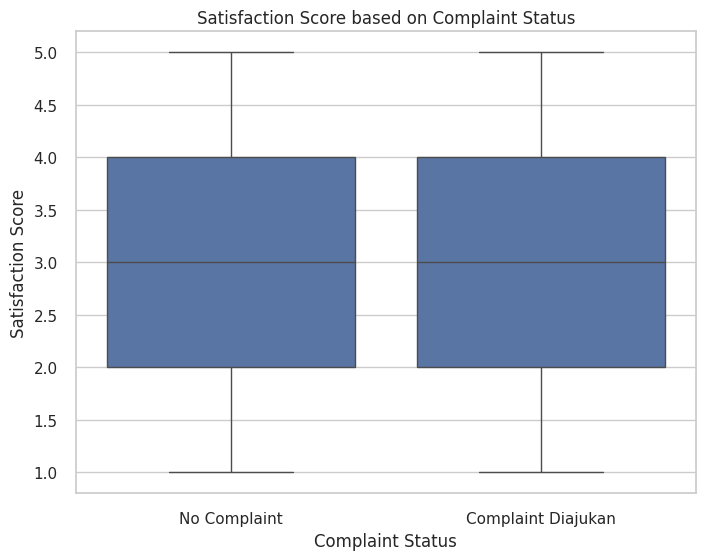

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Complain', y='Satisfaction Score')
plt.title('Satisfaction Score based on Complaint Status')
plt.xlabel('Complaint Status')
plt.ylabel('Satisfaction Score')
plt.xticks(ticks=[0, 1], labels=['No Complaint', 'Complaint Diajukan'])  # Set x-axis labels
plt.show()

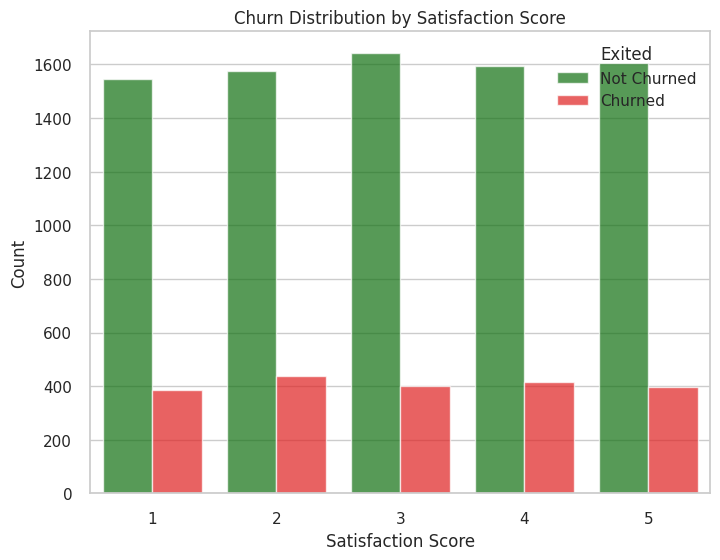

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Satisfaction Score', hue='Exited', order=[1, 2, 3, 4, 5], palette=['green', 'red'], alpha=0.7)
plt.title('Churn Distribution by Satisfaction Score')
plt.xlabel('Satisfaction Score')
plt.ylabel('Count')
plt.legend(title='Exited', loc='upper right', labels=['Not Churned', 'Churned'])
plt.show()

Tampaknya tidak ada korelasi signifikan antara skor kepuasan dan peralihan pelanggan. Skor kepuasan yang lebih tinggi tidak terlihat memiliki dampak yang jelas dalam mengurangi tingkat pergantian.

#### Churn berdasarkan Status Member

In [ ]:
# plt.figure(figsize=(8, 6))
# sns.countplot(data=data, x='IsActiveMember', hue='Exited', palette=['green', 'red'], alpha=0.7)
# plt.title('Churn Distribution by Active Membership')
# plt.xlabel('Active Member')
# plt.ylabel('Count')
# plt.xticks(ticks=[0, 1], labels=['Inactive', 'Active'])  # Set x-axis labels
# plt.legend(title='Exited', loc='upper right', labels=['Not Churned', 'Churned'])
# plt.show()

In [ ]:
# # Plot the churn rate by 'IsActiveMember'
# plt.figure(figsize =(10,6))

# churn_rate_isactivemember = data.groupby(['IsActiveMember'])['Exited'].mean().reset_index()

# sns.barplot(data=churn_rate_isactivemember, x='IsActiveMember', y='Exited', hue='Exited', palette='Dark2', alpha=0.7, legend=False)
# plt.xlabel('Active Membership')
# plt.ylabel('Churn Rate')
# plt.xticks(ticks=[0, 1], labels=['Inactive', 'Active'])  # Set x-axis labels
# plt.show()

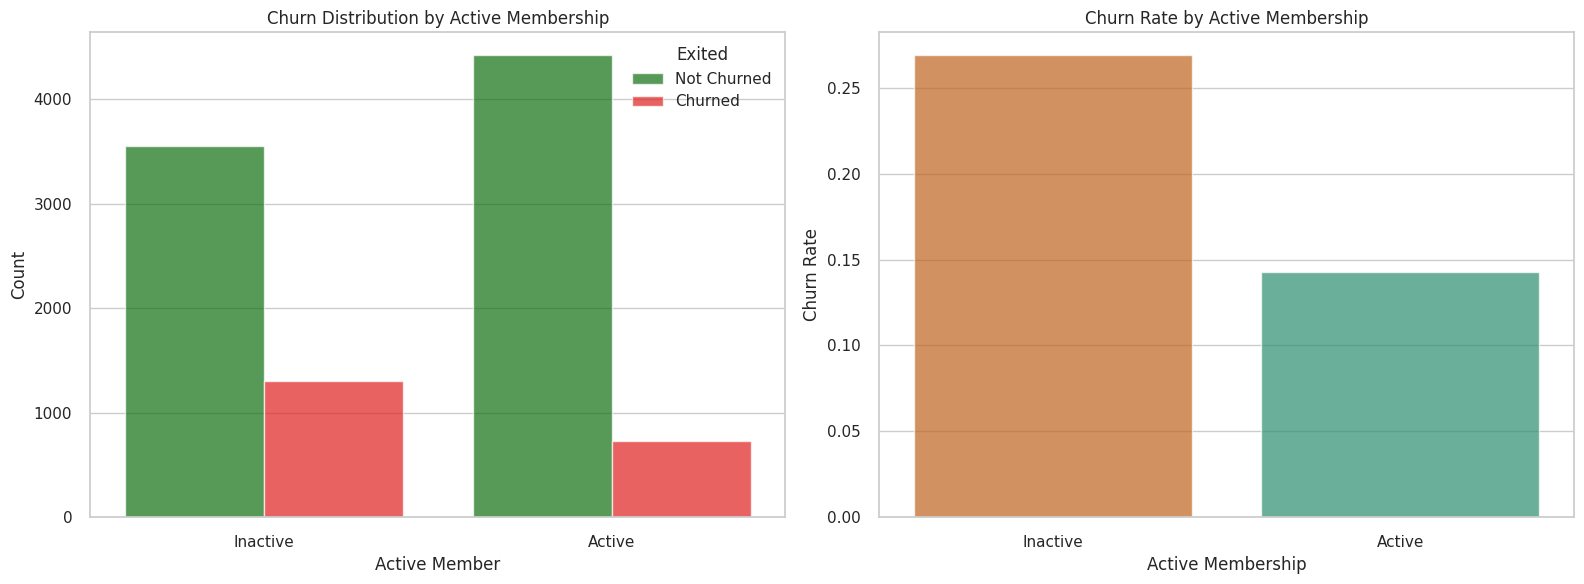

In [ ]:
# Menetapkan style dan size of the plots
sns.set(style="whitegrid")
plt.figure(figsize=(16, 6))

# Plot distribusi churn berdasarkan active membership
plt.subplot(1, 2, 1)
sns.countplot(data=data, x='IsActiveMember', hue='Exited', palette=['green', 'red'], alpha=0.7)
plt.title('Churn Distribution by Active Membership')
plt.xlabel('Active Member')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Inactive', 'Active'])  # Set x-axis labels
plt.legend(title='Exited', loc='upper right', labels=['Not Churned', 'Churned'])

# Plot rate churn berdsarkan active membership
plt.subplot(1, 2, 2)
churn_rate_isactivemember = data.groupby(['IsActiveMember'])['Exited'].mean().reset_index()
sns.barplot(data=churn_rate_isactivemember, x='IsActiveMember', y='Exited', hue='Exited', palette='Dark2', alpha=0.7, legend=False)
plt.title('Churn Rate by Active Membership')
plt.xlabel('Active Membership')
plt.ylabel('Churn Rate')
plt.xticks(ticks=[0, 1], labels=['Inactive', 'Active'])  # Set x-axis labels

# Menampilkan plots
plt.tight_layout()
plt.show()

Anggota aktif cenderung memiliki kemungkinan yang lebih tinggi untuk tetap tinggal (tidak beralih) dibandingkan dengan anggota tidak aktif.

#### Churn berdasarkan Credit Card Skor

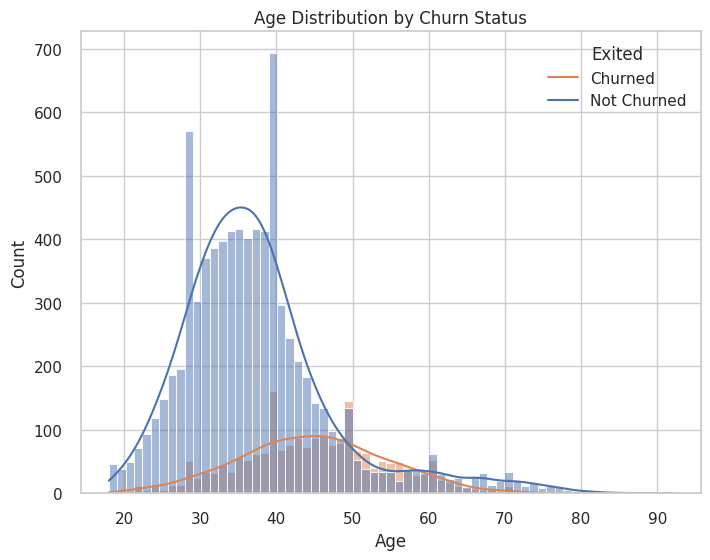

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data, x='Age', hue='Exited', kde=True)
plt.title('Age Distribution by Churn Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Exited', loc='upper right', labels=['Churned', 'Not Churned'])
plt.show()

In [ ]:
import pandas as pd

# Tentukan batas-batas kelompok usia
bins = [0, 20, 30, 40, 50, 60, 70, 80, 100]

# Beri label pada setiap kelompok usia
labels = ['<20', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']

# Tambahkan kolom 'Age Group' ke dalam dataset
data['Age Group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

# Menghitung tingkat churn untuk setiap kelompok usia
age_churn_rate = data.groupby('Age Group')['Exited'].mean() * 100

# Menampilkan hasil
print("Tingkat Churn untuk Setiap Kelompok Usia:")
print(age_churn_rate)


Tingkat Churn untuk Setiap Kelompok Usia:
Age Group
<20       6.122449
20-29     7.600503
30-39    10.883571
40-49    30.825057
50-59    56.041427
60-69    35.200000
70-79    10.294118
80+       6.666667
Name: Exited, dtype: float64


Jelas bahwa pelanggan dengan skor kredit antara 550 hingga 750 adalah yang paling banyak di antara pelanggan yang beralih. Pelanggan dengan skor kredit moderat mungkin lebih sensitif terhadap perubahan dalam kualitas layanan, harga, atau faktor-faktor kompetitif lainnya. Mereka juga mungkin menjadi target bagi pesaing yang menawarkan insentif menarik untuk beralih bank.

In [ ]:
# Menghitung jumlah pelanggan yang churn dan tidak churn berdasarkan kolom 'Complain'
churn_by_complain = data.groupby(['Complain', 'Exited']).size().unstack(fill_value=0)

# Menghitung persentase churn dan tidak churn berdasarkan kolom 'Complain'
churn_by_complain_percentage = churn_by_complain.div(churn_by_complain.sum(axis=1), axis=0) * 100

# Menampilkan hasil dalam bentuk teks
for complain_status in churn_by_complain.index:
    no_complaint_churn = churn_by_complain_percentage.loc[complain_status, 1]
    no_complaint_not_churn = churn_by_complain_percentage.loc[complain_status, 0]
    complain_text = "No Complaint" if complain_status == 0 else "Complaint Lodged"

    print(f"{complain_text}:")
    print(f"  - Percentage of customers who churned: {no_complaint_churn:.2f}%")
    print(f"  - Percentage of customers who did not churn: {no_complaint_not_churn:.2f}%\n")


No Complaint:
  - Percentage of customers who churned: 0.05%
  - Percentage of customers who did not churn: 99.95%

Complaint Lodged:
  - Percentage of customers who churned: 99.51%
  - Percentage of customers who did not churn: 0.49%



## **3. Building ML Predictive Model**

### **3.1 Preprocessing**

In [ ]:
# Pisahkan fitur target dan prediktor
X = data.drop(target, axis=1)
y = data['Exited']

#### Train-test splitting

In [ ]:
# Train-test splitting
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 14), (2000, 14), (8000,), (2000,))

 Kita menetapkan proporsi pembagian data latih dan data uji sebesar 80% dan 20% dari total data.

#### One hot encoding
Diperlukan langkah tambahan untuk mengubah fitur-fitur kategoris menjadi bentuk numerik sebelum dapat digunakan dalam algoritma Machine Learning menggunakan Scikit-learn. Fitur-fitur kategoris ini perlu di-"encode" agar bisa direpresentasikan dalam bentuk angka.

Untuk fitur-fitur nominal diterapkan one-hot encoding. Ini dilakukan agar setiap nilai unik di bawah fitur nominal multilevel diwakili oleh kolom biner.

In [ ]:
#fitur kategorikal yang relevan
nominal_cat_feats = ['Gender', 'Geography']

In [ ]:
encoder = OneHotEncoder(sparse_output=False)
nominal_mat = encoder.fit_transform(X_train[nominal_cat_feats])
nominal_df = pd.DataFrame(nominal_mat,
                          columns=encoder.get_feature_names_out(),
                          index=X_train.index)

X_train = X_train.drop(columns=nominal_cat_feats)
X_train = pd.concat([X_train, nominal_df],axis=1)

In [ ]:
nominal_mat_test = encoder.transform(X_test[nominal_cat_feats])
nominal_df_test = pd.DataFrame(nominal_mat_test,
                               columns=encoder.get_feature_names_out(),
                               index=X_test.index)

X_test = X_test.drop(columns=nominal_cat_feats)
X_test = pd.concat([X_test, nominal_df_test],axis=1)

#### Ordinal encoding mapping

In [ ]:
encoder = OrdinalEncoder(categories=[np.array(['SILVER','GOLD', 'PLATINUM','DIAMOND'],dtype=object)])
X_train['Card Type'] = encoder.fit_transform(X_train[['Card Type']])
X_test['Card Type'] = encoder.transform(X_test[['Card Type']])

In [ ]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
1212,610,42,6,0.00,2,1,0,158302.59,1,5,3.0,237,0.0,1.0,0.0,0.0,1.0
3894,595,37,2,157084.99,1,1,0,134767.13,0,5,1.0,974,0.0,1.0,0.0,0.0,1.0
170,484,29,4,130114.39,1,1,0,164017.89,0,1,1.0,249,1.0,0.0,1.0,0.0,0.0
6697,638,41,1,131762.94,1,1,1,47675.29,0,4,2.0,503,0.0,1.0,1.0,0.0,0.0
6370,707,35,2,0.00,3,1,1,94148.30,0,2,0.0,855,0.0,1.0,1.0,0.0,0.0


#### Min Max scaler
Scaling atau penskalaan fitur deskriptif sangat bermanfaat karena dapat mengnormalisasi nilai-nilai numerik di antara berbagai variabel dalam rentang tertentu. Dampaknya adalah kita akan mendapatkan standar deviasi yang lebih kecil, sehingga dapat menekan efek outlier.

Dalam kasus ini, diterapkan teknik Min-Max Scaling untuk mengubah sebuah kumpulan data menjadi skala mulai dari 0 (min) hingga 1 (max).

In [ ]:
# Min Max scaler
sc = MinMaxScaler()
X_train_sc = pd.DataFrame(sc.fit_transform(X_train), columns=X_train.columns)
X_test_sc = pd.DataFrame(sc.transform(X_test), columns=X_test.columns)
X_train_sc.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,0.520,0.324324,0.6,0.000000,0.333333,1.0,0.0,0.791531,1.0,1.00,1.000000,0.133939,0.0,1.0,0.0,0.0,1.0
1,0.490,0.256757,0.2,0.626091,0.000000,1.0,0.0,0.673842,0.0,1.00,0.333333,0.970488,0.0,1.0,0.0,0.0,1.0
2,0.268,0.148649,0.4,0.518595,0.000000,1.0,0.0,0.820110,0.0,0.00,0.333333,0.147560,1.0,0.0,1.0,0.0,0.0
3,0.576,0.310811,0.1,0.525165,0.000000,1.0,1.0,0.238341,0.0,0.75,0.666667,0.435868,0.0,1.0,1.0,0.0,0.0
4,0.714,0.229730,0.2,0.000000,0.666667,1.0,1.0,0.470729,0.0,0.25,0.000000,0.835414,0.0,1.0,1.0,0.0,0.0


#### Oversampling menggunakan metode SMOTE

In [ ]:
print(y_train.value_counts())

Exited
0    6370
1    1630
Name: count, dtype: int64


Dari hasil output, terlihat bahwa kelas target(y) tidak seimbang, di mana jumlah "0" (not churn) lebih dari 3 kali lipat jumlah "1" (churn).

Kita akan menangani masalah ketidakseimbangan dalam dataset menggunakan pendekatan oversampling. Ini berarti kita membuat lebih banyak sampel dari kelas minoritas dalam dataset kita. <br> Metode SMOTE (Synthetic Minority Over-sampling Technique) bekerja dengan membuat sampel sintetis baru yang serupa dengan tetangga terdekat dari setiap titik dalam kelas minoritas, sehingga menciptakan distribusi kelas yang lebih seimbang.

In [ ]:
sm = SMOTE(
    sampling_strategy='auto',  # samples only the minority class
    random_state=0,  # for reproducibility
    k_neighbors=5
)

X_res, y_res = sm.fit_resample(X_train_sc, y_train)
print(y_res.value_counts())

Exited
1    6370
0    6370
Name: count, dtype: int64


### **3.2 Modelling**

Random forest adalah algoritma machine learning yang menggabungkan beberapa decision tree untuk mencapai hasil yang lebih akurat. Setiap pohon dalam forest secara independen memprediksi variabel target, dan prediksi akhir ditentukan dengan cara mengambil rata-rata prediksi (regresi) atau mengambil suara terbanyak (klasifikasi) dari semua pohon.

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_res, y_res)

preds = rf.predict(X_test_sc)

### **3.3 Model Evaluation**

In [ ]:
print('F-measure Random Forest test:', f1_score(y_test, preds, pos_label=1))
print('Recall Random Forest test:', recall_score(y_test, preds, pos_label=1))
print('Precision Random Forest test:', precision_score(y_test, preds))


F-measure Random Forest test: 0.9987760097919216
Recall Random Forest test: 1.0
Precision Random Forest test: 0.9975550122249389


In [ ]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1592
           1       1.00      1.00      1.00       408

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



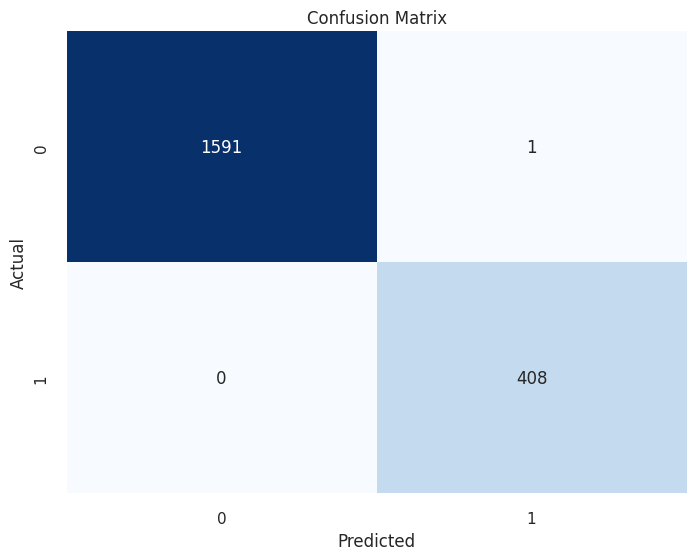

In [ ]:
# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Hitung jumlah pelanggan yang diprediksi churn dan stay
preds_series = pd.Series(preds)
preds_counts = preds_series.value_counts()

# Tampilkan hasil
print("Number of customers predicted to churn:", preds_counts[1])
print("Number of customers predicted to stay:", preds_counts[0])

Number of customers predicted to churn: 409
Number of customers predicted to stay: 1591


ROC AUC Score: 0.9999291802147994


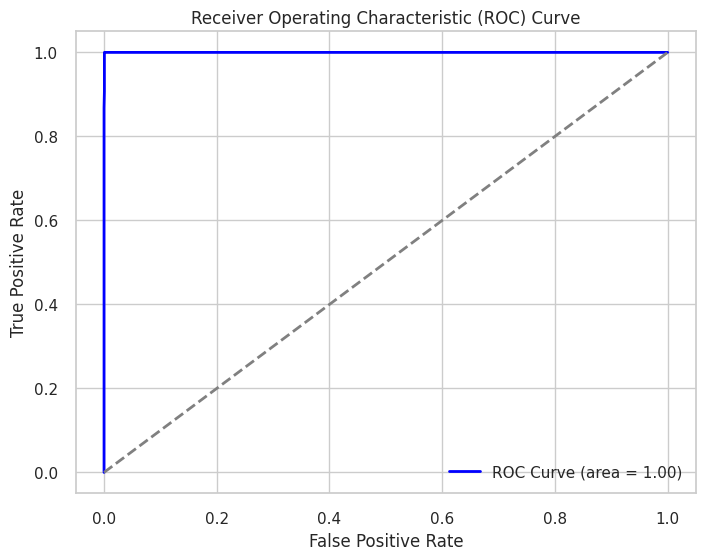

In [ ]:
# Import library yang diperlukan
from sklearn.metrics import roc_auc_score, roc_curve

# Hitung prediksi probabilitas
y_pred_proba = rf.predict_proba(X_test_sc)[:, 1]

# Hitung ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)

print('ROC AUC Score:', roc_auc)

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Hitung jumlah pelanggan yang diprediksi churn dan stay
preds_series = pd.Series(preds)
preds_counts = preds_series.value_counts()


## **4. Kesimpulan**
- Model RFC menunjukkan kinerja prediksi yang luar biasa (mendekati 100%), menandakan pemilihan fitur dan pelatihan model yang bagus.
- Analisis memberikan pemahaman yang jelas tentang pendorong churn: complain, usia, skor kredit, masa tenure, dan jumlah produk.
- Implementasi dari pemahaman ini dapat membantu dalam merancang strategi retensi yang terarah dan meningkatkan kepuasan pelanggan.

## **Tambahan**

### 10 Fitur Teratas

In [ ]:
# Ambil nilai kepentingan fitur
feature_importances = rf.feature_importances_

# Buat DataFrame untuk menyimpan nilai kepentingan fitur beserta nama fitur
feature_importance_df = pd.DataFrame({'Feature': X_train_sc.columns, 'Importance': feature_importances})

# Urutkan DataFrame berdasarkan nilai kepentingan
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Tampilkan fitur teratas
print("Top Features:")
print(feature_importance_df.head(10))

Top Features:
               Feature  Importance
8             Complain    0.783946
1                  Age    0.086182
4        NumOfProducts    0.056808
3              Balance    0.019095
6       IsActiveMember    0.009796
15   Geography_Germany    0.008705
9   Satisfaction Score    0.006518
11        Point Earned    0.004626
7      EstimatedSalary    0.004564
2               Tenure    0.004240


Hasil di atas menunjukkan 10 fitur teratas yang memiliki kontribusi paling tinggi menurut model sebelumnya, beserta bobot kontribusi masing-masing fitur.

### Random Forest dengan 10 Fitur Teratas

F-measure Random Forest test (top 10 features): 0.9987760097919216
Recall Random Forest test (top 10 features): 1.0
Precision Random Forest test (top 10 features): 0.9975550122249389
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1592
           1       1.00      1.00      1.00       408

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



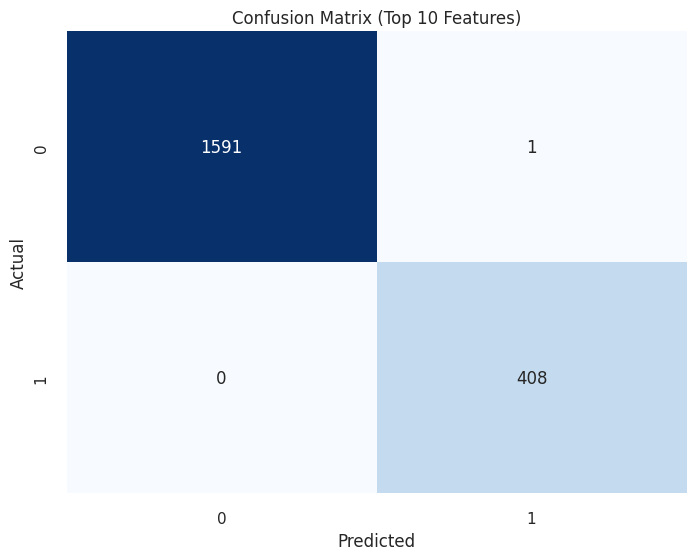

In [ ]:
# Pilih 10 fitur teratas
top_features = feature_importance_df['Feature'].head(10).tolist()

# Filter dataset latih dan uji hanya menggunakan 10 fitur teratas
X_train_top = X_train_sc[top_features]
X_test_top = X_test_sc[top_features]

# Latih ulang model Random Forest menggunakan 10 fitur teratas
rf_top = RandomForestClassifier()
rf_top.fit(X_train_top, y_train)

# Prediksi menggunakan model yang telah dilatih
preds_top = rf_top.predict(X_test_top)

# Evaluasi model
print('F-measure Random Forest test (top 10 features):', f1_score(y_test, preds_top, pos_label=1))
print('Recall Random Forest test (top 10 features):', recall_score(y_test, preds_top, pos_label=1))
print('Precision Random Forest test (top 10 features):', precision_score(y_test, preds_top))

print(classification_report(y_test, preds_top))

# Confusion Matrix Visualization
conf_matrix_top = confusion_matrix(y_test, preds_top)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_top, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Top 10 Features)")
plt.show()

### Random Forest Tanpa Fitur Complain

F-measure Random Forest test (without Complain): 0.560126582278481
Recall Random Forest test (without Complain): 0.4338235294117647
Precision Random Forest test (without Complain): 0.7901785714285714
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1592
           1       0.79      0.43      0.56       408

    accuracy                           0.86      2000
   macro avg       0.83      0.70      0.74      2000
weighted avg       0.85      0.86      0.84      2000



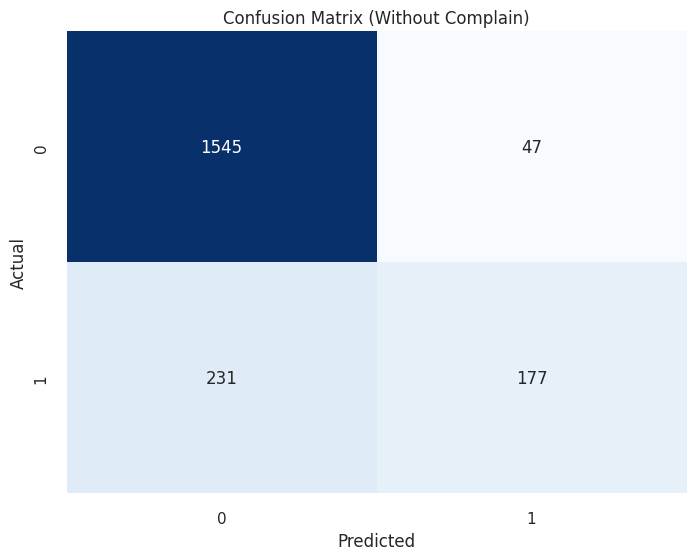

In [ ]:
# Hapus fitur "Complain" dari dataset latih dan uji
X_train_no_complain = X_train_sc.drop(columns=['Complain'])
X_test_no_complain = X_test_sc.drop(columns=['Complain'])

# Latih model Random Forest tanpa fitur "Complain"
rf_no_complain = RandomForestClassifier()
rf_no_complain.fit(X_train_no_complain, y_train)

# Prediksi menggunakan model yang telah dilatih
preds_no_complain = rf_no_complain.predict(X_test_no_complain)

# Evaluasi model
print('F-measure Random Forest test (without Complain):', f1_score(y_test, preds_no_complain, pos_label=1))
print('Recall Random Forest test (without Complain):', recall_score(y_test, preds_no_complain, pos_label=1))
print('Precision Random Forest test (without Complain):', precision_score(y_test, preds_no_complain))

print(classification_report(y_test, preds_no_complain))

# Confusion Matrix Visualization
conf_matrix_no_complain = confusion_matrix(y_test, preds_no_complain)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_no_complain, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Without Complain)")
plt.show()